Water Sensor Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Water-Sensor-repository/main/wafer_23012020_041211.csv")
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
df.tail()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
95,Wafer-896,3013.66,2526.44,2185.2111,1141.6306,0.8447,100.0,100.5978,0.1217,1.5337,...,NaN,0.5013,0.0076,0.0021,1.5152,0.0153,0.0048,0.0017,31.0176,-1
96,Wafer-897,2982.87,2477.01,2315.2667,2360.1325,1.1259,100.0,90.1144,0.1160,1.4695,...,NaN,0.5003,0.0106,0.0028,2.1263,0.0153,0.0048,0.0017,31.0176,1
97,Wafer-898,3084.82,2387.42,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.3603,...,NaN,0.5016,0.0130,0.0028,2.5865,0.0153,0.0048,0.0017,31.0176,-1
98,Wafer-899,2955.87,2541.89,NaN,NaN,NaN,NaN,NaN,NaN,1.4493,...,NaN,0.5023,0.0140,0.0033,2.7810,0.0153,0.0048,0.0017,31.0176,-1
99,Wafer-900,2914.86,2465.11,2210.2778,2120.5760,1.0700,100.0,95.1089,0.1230,1.5817,...,NaN,0.5026,0.0121,0.0032,2.4064,0.0153,0.0048,0.0017,31.0176,1


In [4]:
df.rename(columns = {'Unnamed: 0':"Wafers"}, inplace = True)

In [5]:
df

,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wafer-896,3013.66,2526.44,2185.2111,1141.6306,0.8447,100.0,100.5978,0.1217,1.5337,...,NaN,0.5013,0.0076,0.0021,1.5152,0.0153,0.0048,0.0017,31.0176,-1
96,Wafer-897,2982.87,2477.01,2315.2667,2360.1325,1.1259,100.0,90.1144,0.1160,1.4695,...,NaN,0.5003,0.0106,0.0028,2.1263,0.0153,0.0048,0.0017,31.0176,1
97,Wafer-898,3084.82,2387.42,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.3603,...,NaN,0.5016,0.0130,0.0028,2.5865,0.0153,0.0048,0.0017,31.0176,-1
98,Wafer-899,2955.87,2541.89,NaN,NaN,NaN,NaN,NaN,NaN,1.4493,...,NaN,0.5023,0.0140,0.0033,2.7810,0.0153,0.0048,0.0017,31.0176,-1


In [6]:
from sklearn.model_selection import train_test_split


df, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, Wafers to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 83 to 31
Columns: 592 entries, Wafers to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 92.7+ KB


In [8]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


In [9]:
df['Good/Bad'].isnull().sum()

np.int64(0)

In [10]:
df.isnull().sum()

Wafers        0
Sensor-1      1
Sensor-2      0
Sensor-3      2
Sensor-4      2
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

In [11]:
df.isnull().sum().sum()

np.int64(1822)

In [12]:
df.isnull().sum().sum()/ (df.shape[0] * (df.shape[1] - 1)) *100

np.float64(3.8536379018612523)

In [13]:
df_test.isnull().sum().sum()

np.int64(484)

In [14]:
df

,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Wafer-861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.0,100.1800,0.1201,1.4532,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,Wafer-872,3043.18,2545.53,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.3824,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,Wafer-815,3001.26,2519.92,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.5172,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,Wafer-893,3007.00,2572.62,2213.2111,2070.7147,1.9705,100.0,87.7411,0.1232,1.4446,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


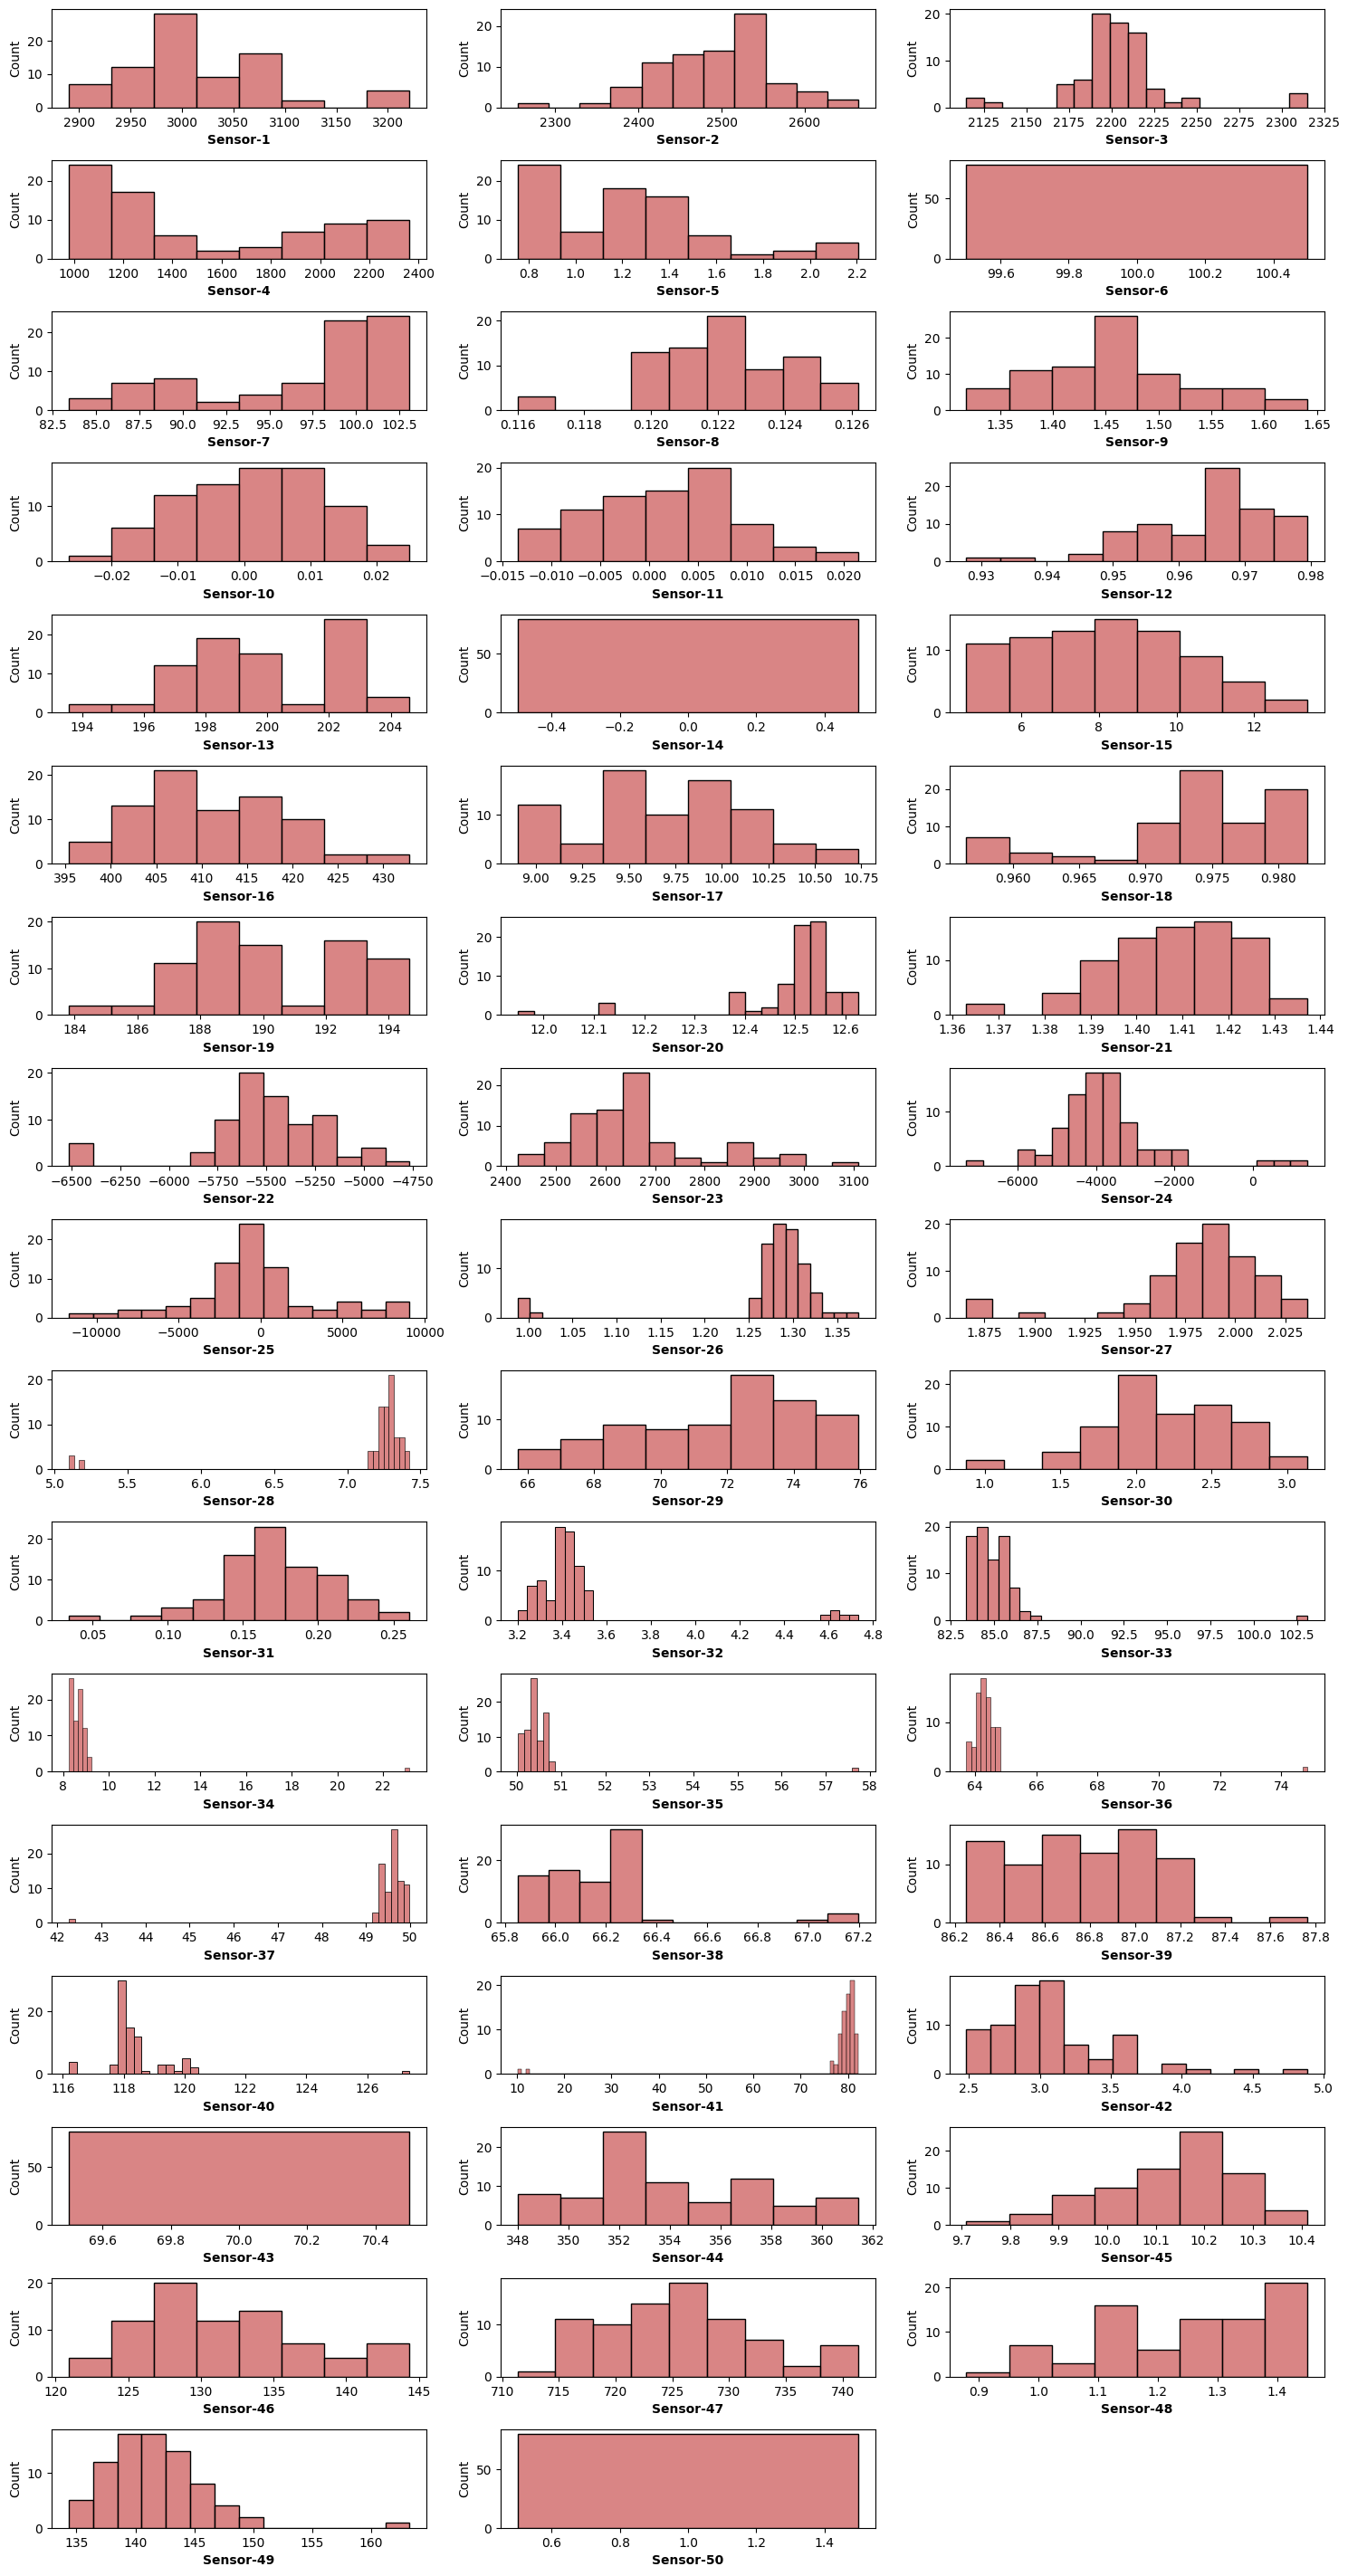

In [15]:
# let's have a look at the distribution first 50 sensors of Wafers

plt.figure(figsize=(15, 100))

for i, col in enumerate(df.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.histplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [16]:
random_50_sensors = []
for i in range(50):
    if i not in random_50_sensors:
        random_50_sensors.append(np.random.randint(1,591))

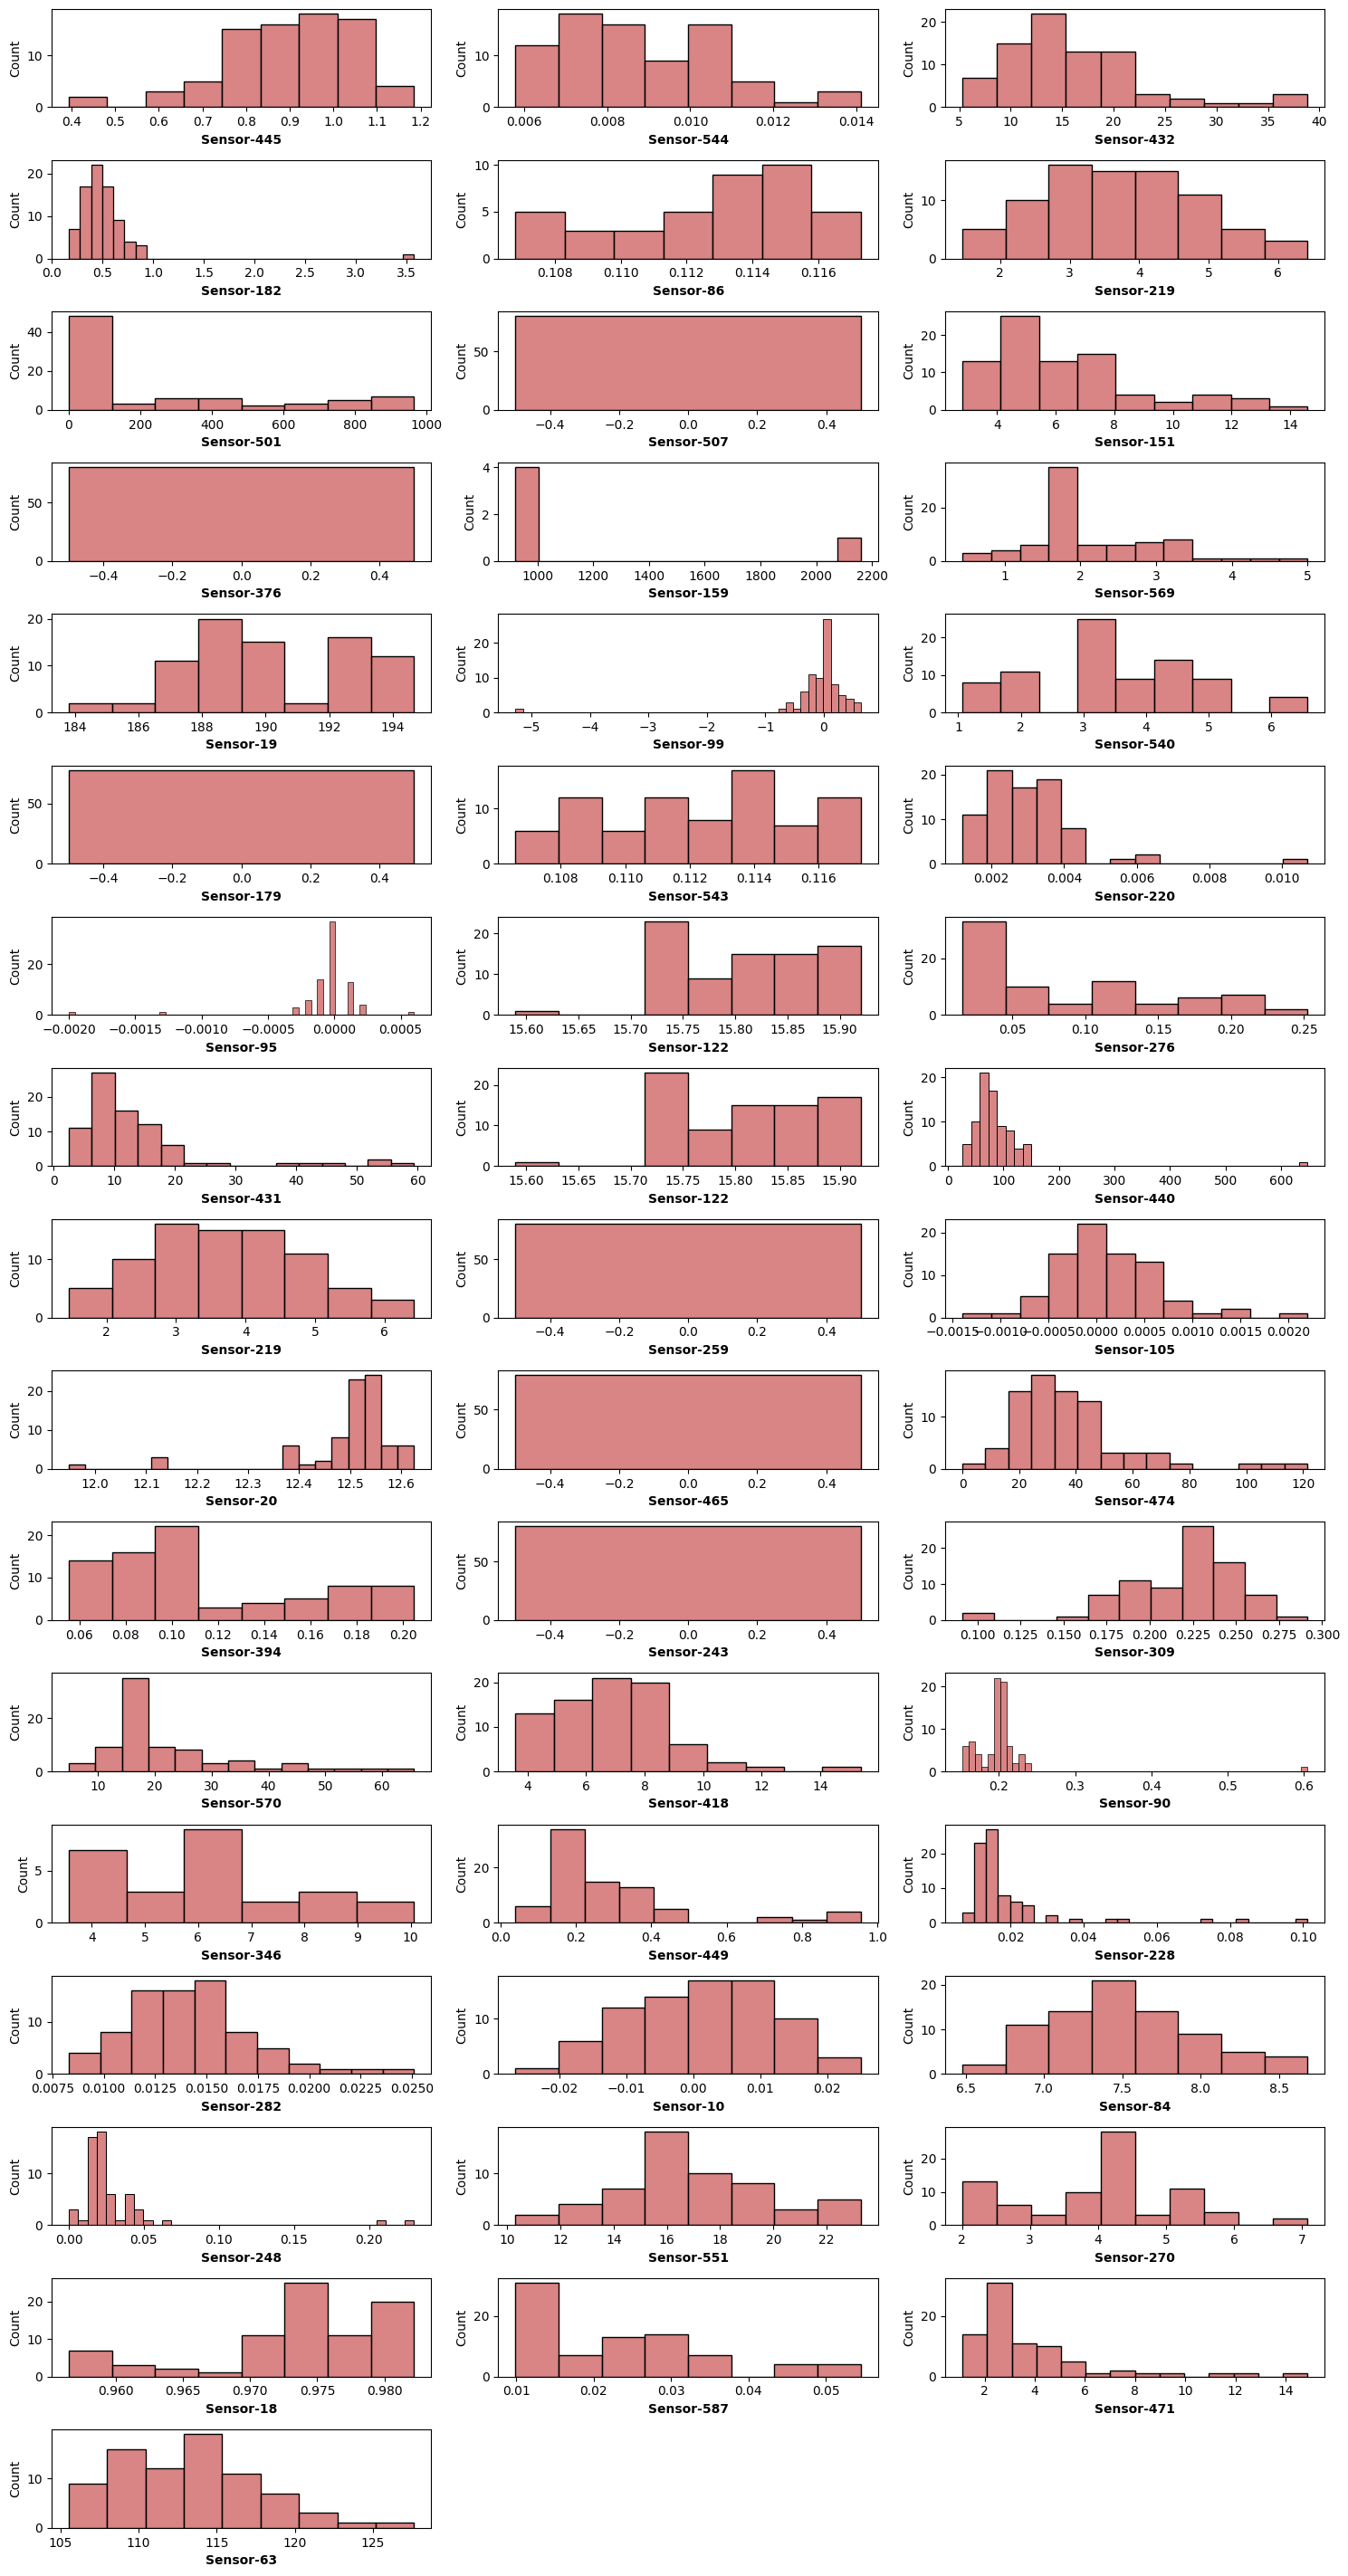

In [17]:
# let's have a look at the distribution first 50 sensors of Wafers

plt.figure(figsize=(15, 100))

for i, col in enumerate(df.columns[random_50_sensors]):
    plt.subplot(60, 3, i+1)
    sns.histplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [18]:
def get_cols_zero_std(df : pd.DataFrame):
    cols_to_drop = []
    num_cols = [i for i in df.columns[1:] if df[i].dtype != "O"]
    for i in df.columns[1:]:
        if df[i].std() ==0:
            cols_to_drop.append(i)
    return cols_to_drop

In [19]:
def get_reduntant_col(df: pd.DataFrame, missing_thresh = .7):
    cols_missing_ratio = df.isnull().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratio[cols_missing_ratio > missing_thresh].index)
    return cols_to_drop

In [20]:
df

,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Wafer-861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.0,100.1800,0.1201,1.4532,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,Wafer-872,3043.18,2545.53,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.3824,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,Wafer-815,3001.26,2519.92,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.5172,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,Wafer-893,3007.00,2572.62,2213.2111,2070.7147,1.9705,100.0,87.7411,0.1232,1.4446,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [21]:
cols_drop_1 = get_cols_zero_std(df = df)
cols_drop_1

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [22]:
cols_drop_2 = get_reduntant_col(df, missing_thresh= .7)
cols_drop_2

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [23]:
cols_to_drop = cols_drop_1 +cols_drop_2 +['Wafers']
len(cols_to_drop)

127

In [24]:
df

,Wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,Wafer-856,NaN,2532.45,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5762,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,Wafer-889,3221.21,2391.20,2189.9667,1046.6212,0.8662,100.0,102.3622,0.1208,1.4756,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,Wafer-827,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.0,100.7744,0.1234,1.5590,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,Wafer-843,2982.07,2447.06,2199.6334,1242.8420,1.4083,100.0,99.2178,0.1221,1.4542,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,Wafer-870,3058.08,2524.60,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.4958,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Wafer-861,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.0,100.1800,0.1201,1.4532,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,Wafer-872,3043.18,2545.53,2192.3778,1110.5453,0.8147,100.0,99.2922,0.1226,1.3824,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,Wafer-815,3001.26,2519.92,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.5172,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,Wafer-893,3007.00,2572.62,2213.2111,2070.7147,1.9705,100.0,87.7411,0.1232,1.4446,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [25]:
x, y = df.drop(cols_to_drop, axis = 1), df['Good/Bad']

In [26]:
x.shape

(80, 465)

In [27]:
y.shape

(80,)

In [28]:
y.value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler

In [30]:
imputer = KNNImputer(n_neighbors= 3)
prep_process = Pipeline(steps = [('Imputer', imputer), ('Scaling' ,RobustScaler()) ])
prep_process

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaling', RobustScaler())])

In [31]:
X_trans = prep_process.fit_transform(x)
X_trans.shape

(80, 465)

In [32]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import numpy as np
from typing import Tuple

def cluster_data_instances(X: np.array) -> Tuple[KMeans, np.array]:
    wcss = []  # Within Summation of Squares

    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    knee_finder = KneeLocator(
        range(1, 11), wcss, curve='convex', direction='decreasing')
    ideal_clusters = knee_finder.knee

    kmeans = KMeans(n_clusters=ideal_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    return kmeans, np.c_[X, y_kmeans]

# Usage example:
kmeans, X_clus = cluster_data_instances(X_trans)


In [34]:
kmeans

KMeans(n_clusters=np.int64(3), random_state=42)

In [35]:
X_clus

array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.75955556,
         0.        ,  1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.52610857,
         0.        ,  1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ..., -0.08775867,
         0.        ,  1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ..., -0.17805529,
         0.        ,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.28421459,
         0.        ,  1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.20782888,
         0.        ,  1.        ]])

In [36]:
np.unique(X_clus[:,-1])

array([0., 1., 2.])

In [37]:
wafer_clus = np.c_[X_clus, y]
wafer_clus


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.        ,
         1.        , -1.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ...,  0.        ,
         1.        , -1.        ],
       [-0.60204699,  0.28110298, -0.49685153, ...,  0.        ,
         1.        , -1.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ...,  0.        ,
         0.        , -1.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.        ,
         1.        , -1.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ...,  0.        ,
         1.        , -1.        ]])

In [38]:
wafer_clus[wafer_clus[:,-2] == 0].shape

(17, 467)

In [39]:
wafer_clus[wafer_clus[:,-2] == 1].shape

(62, 467)

In [40]:
wafer_clus[wafer_clus[:,-2] == 2].shape

(1, 467)

In [41]:
from imblearn.combine import SMOTETomek


In [42]:

X, y = X_trans[:,:-1], y
resampler = SMOTETomek(sampling_strategy= "auto")
X_res, y_res = resampler.fit_resample(X,y)


In [43]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (80, 465)
After resampling, Shape of training instances:  (148, 465)


In [44]:
## Target Cats after Resampling

print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 74, 1: 74


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42)

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((98, 464), (98,))
test set: ((50, 464), (50,))


In [46]:
# Prepared training and test sets

X_prep = X_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test

print(X_prep.shape, y_prep.shape)
print(X_test_prep.shape, y_test_prep.shape)

(98, 464) (98,)
(50, 464) (50,)


In [51]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score


svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier()

In [52]:
## A function to display Scores

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [53]:
## SVC Scores

svc_scores = cross_val_score(svc_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)
display_scores(svc_scores)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [54]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_preds = cross_val_predict(svc_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_auc = roc_auc_score(y_test_prep, svc_preds)
svc_auc

np.float64(0.94)

In [55]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_preds = cross_val_predict(svc_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_auc = roc_auc_score(y_test_prep, svc_preds)
svc_auc

np.float64(0.94)

In [56]:
## SVC rbf Scores

svc_rbf_scores = cross_val_score(svc_rbf_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)
display_scores(svc_rbf_scores)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Scores:  [1.   0.8  1.   0.92 0.8  0.92 0.92 0.88 1.   1.  ]
Mean:  0.924
Standard Deviation:  0.0747261667690776


In [57]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_rbf_auc = roc_auc_score(y_test_prep, svc_rbf_preds)
svc_rbf_auc

np.float64(0.6799999999999999)

In [58]:
## Random Forest Scores

random_clf_scores = cross_val_score(random_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)
display_scores(random_clf_scores)

[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [61]:
## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test_prep, random_clf_preds)
random_clf_auc

np.float64(1.0)

In [62]:
## XGB

xgb_clf_scores = cross_val_score(xgb_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)
display_scores(xgb_clf_scores)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rajsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rajsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\rajsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [-1  1]


In [63]:
y_prep

65    -1
28    -1
40    -1
60    -1
24    -1
      ..
71    -1
106    1
14    -1
92     1
102    1
Name: Good/Bad, Length: 98, dtype: int64